In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# from google.colab import auth
# auth.authenticate_user()

In [5]:
# !pip install opencv-python

In [1]:
import matplotlib.pyplot as plt
import csv
from collections import defaultdict, namedtuple
from sklearn.metrics import confusion_matrix
import os
import cv2 as cv
from PIL import Image
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense,BatchNormalization,Activation
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [7]:
from zipfile import ZipFile 
# archive = zipfile.ZipFile('images.zip', 'r')
# imgfile = archive.open('img_01.png')
# specifying the zip file name 
file_name = "gtsrb-german-traffic-sign/gtsrb-german-traffic-sign.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
#     zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
#     data = zip.read(name_of_file_to_read)
    print('Done!') 

FileNotFoundError: [Errno 2] No such file or directory: 'gtsrb-german-traffic-sign/gtsrb-german-traffic-sign.zip'

In [2]:
x_train_ = []
y_train_ = []

for i in range(0,43):
    n = str(i)
    train_Path = "gtsrb-german-traffic-sign/Train/" + n
    label = [0 for i in range(0, 43)]
    label[i] = 1
    for filename in os.listdir(train_Path):
        img = cv.imread(train_Path + "/" + filename)
        img = cv.resize(img, (30,30))
        x_train_.append(img)
        y_train_.append(label)

x_train = np.asarray(x_train_)
x_train = x_train/255
x_train = np.asarray(x_train, dtype = "float32")
y_train = np.asarray(y_train_, dtype= "float32")         


In [17]:
x_test = []
test_Path = "gtsrb-german-traffic-sign/Test/"
for filename in os.listdir(test_Path):
    if(filename != 'GT-final_test.csv'):
        img = cv.imread(test_Path + "/" + filename)
        img = cv.resize(img, (30,30))
        x_test.append(img)

x_test = np.asarray(x_test)
x_test = x_test/255
x_test = np.asarray(x_test, dtype = "float32")


In [18]:
df = pd.read_csv('gtsrb-german-traffic-sign/Test.csv', index_col=0)
y_test = df['ClassId']
y_test = to_categorical(y_test, num_classes=43)

In [3]:
#Build Model
height = 30
width = 30
channels = 3
num_classes = 43


model = keras.models.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
#model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [5]:
#fit model with adam opt
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)
epochs = 100
history_adam = model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)

Train on 27446 samples, validate on 11763 samples
Epoch 1/100
27446/27446 [==============================] - 26s 950us/sample - loss: 1.0478 - accuracy: 0.6870 - val_loss: 0.3781 - val_accuracy: 0.8914
Epoch 2/100
27446/27446 [==============================] - 25s 927us/sample - loss: 0.1950 - accuracy: 0.9431 - val_loss: 0.1719 - val_accuracy: 0.9491
Epoch 3/100
27446/27446 [==============================] - 25s 906us/sample - loss: 0.0921 - accuracy: 0.9742 - val_loss: 0.1037 - val_accuracy: 0.9737
Epoch 4/100
27446/27446 [==============================] - 24s 859us/sample - loss: 0.0525 - accuracy: 0.9846 - val_loss: 0.0680 - val_accuracy: 0.9833
Epoch 5/100
27446/27446 [==============================] - 24s 857us/sample - loss: 0.0448 - accuracy: 0.9864 - val_loss: 0.1038 - val_accuracy: 0.9731
Epoch 6/100
27446/27446 [==============================] - 24s 858us/sample - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.1148 - val_accuracy: 0.9706
Epoch 7/100
27446/27446 [=============

27446/27446 [==============================] - 26s 937us/sample - loss: 2.2451e-08 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9948
Epoch 54/100
27446/27446 [==============================] - 24s 868us/sample - loss: 1.4911e-08 - accuracy: 1.0000 - val_loss: 0.0628 - val_accuracy: 0.9950
Epoch 55/100
27446/27446 [==============================] - 24s 883us/sample - loss: 1.0216e-08 - accuracy: 1.0000 - val_loss: 0.0636 - val_accuracy: 0.9950
Epoch 56/100
27446/27446 [==============================] - 24s 871us/sample - loss: 6.8148e-09 - accuracy: 1.0000 - val_loss: 0.0645 - val_accuracy: 0.9950
Epoch 57/100
27446/27446 [==============================] - 25s 899us/sample - loss: 4.6388e-09 - accuracy: 1.0000 - val_loss: 0.0651 - val_accuracy: 0.9950
Epoch 58/100
27446/27446 [==============================] - 24s 877us/sample - loss: 3.0882e-09 - accuracy: 1.0000 - val_loss: 0.0661 - val_accuracy: 0.9950
Epoch 59/100
27446/27446 [==============================] - 24s 871us/s

In [14]:
#build model with SGD opt
height = 30
width = 30
channels = 3
num_classes = 43


model_sgd = keras.models.Sequential()

model_sgd.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
#model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

model_sgd.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

model_sgd.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
#model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model_sgd.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.25))

model_sgd.add(Flatten())
model_sgd.add(Dense(256, activation='relu'))
#model.add(Dropout(rate=0.5))
model_sgd.add(Dense(num_classes, activation='softmax'))

model_sgd.summary()

model_sgd.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [6]:
#fit model with SGD opt
model_sgd.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)
epochs = 15
history_sgd = model_sgd.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)

Train on 27446 samples, validate on 11763 samples
Epoch 1/15
27446/27446 [==============================] - 26s 935us/sample - loss: 3.4606 - accuracy: 0.0877 - val_loss: 3.2836 - val_accuracy: 0.1156
Epoch 2/15
27446/27446 [==============================] - 25s 895us/sample - loss: 2.7875 - accuracy: 0.2560 - val_loss: 2.2345 - val_accuracy: 0.3757
Epoch 3/15
27446/27446 [==============================] - 24s 877us/sample - loss: 1.7456 - accuracy: 0.4962 - val_loss: 1.3548 - val_accuracy: 0.5993
Epoch 4/15
27446/27446 [==============================] - 25s 912us/sample - loss: 1.0348 - accuracy: 0.6986 - val_loss: 0.8729 - val_accuracy: 0.7212
Epoch 5/15
27446/27446 [==============================] - 24s 888us/sample - loss: 0.6668 - accuracy: 0.8036 - val_loss: 0.5719 - val_accuracy: 0.8378
Epoch 6/15
27446/27446 [==============================] - 25s 900us/sample - loss: 0.4714 - accuracy: 0.8615 - val_loss: 0.4700 - val_accuracy: 0.8608
Epoch 7/15
27446/27446 [====================

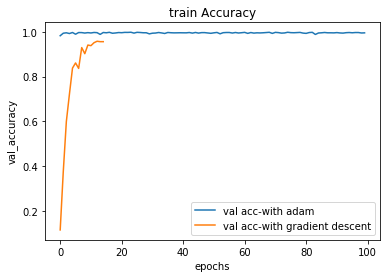

In [38]:
#plot adam & SGD
plt.figure(0)
plt.plot(history_adam.history['val_accuracy'], label='val acc-with adam')
plt.plot(history_sgd.history['val_accuracy'], label='val acc-with gradient descent')
plt.title('train Accuracy')
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.legend()

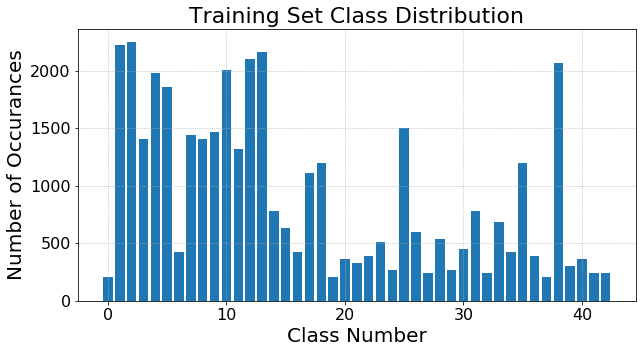

In [41]:
#plot data distribution
plt.figure(0, figsize = (10,5))
W=range(43)
out=W*y_train
cc=[]
for i in range(len(out)):
    cc.append(sum(out[i]))
    
unique_train, counts_train = np.unique(cc, return_counts = True)
plt.bar(unique_train, counts_train)

plt.title('Training Set Class Distribution', fontsize=22)
plt.xlabel('Class Number', fontsize=20)
plt.ylabel('Number of Occurances', fontsize=20)
plt.tick_params(labelsize=16)
plt.grid(linestyle=':')


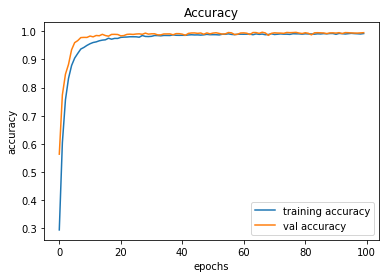

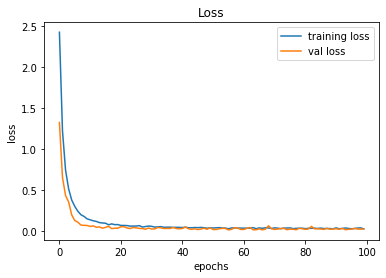

In [25]:
# plot the accuracy and the loss
import matplotlib.pyplot as plt
history=history_aug
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [21]:
loss,acc = model.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

12630/12630 [==============================] - 5s 377us/sample - loss: 0.5178 - accuracy: 0.9526
loss =  0.5178394120105384 acc =  0.95257324


In [22]:
loss,acc = model_sgd.evaluate(x_test,y_test)
print('loss = ',loss,'acc = ',acc)

12630/12630 [==============================] - 5s 379us/sample - loss: 0.5078 - accuracy: 0.9553
loss =  0.5077696289764828 acc =  0.9552652


In [15]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2)

#datagen.fit(X_train)
history_aug=model_sgd.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),validation_data=(X_valid,Y_valid),
                   steps_per_epoch=len(X_train) /32, epochs=100)

  ...
    to  
  ['...']
Train for 857.6875 steps, validate on 11763 samples
Epoch 1/100
858/857 [==============================] - 35s 41ms/step - loss: 2.4210 - accuracy: 0.2945 - val_loss: 1.3233 - val_accuracy: 0.5634
Epoch 2/100
858/857 [==============================] - 34s 40ms/step - loss: 1.2206 - accuracy: 0.6039 - val_loss: 0.6550 - val_accuracy: 0.7737
Epoch 3/100
858/857 [==============================] - 34s 39ms/step - loss: 0.7430 - accuracy: 0.7559 - val_loss: 0.4342 - val_accuracy: 0.8471
Epoch 4/100
858/857 [==============================] - 34s 39ms/step - loss: 0.5154 - accuracy: 0.8324 - val_loss: 0.3571 - val_accuracy: 0.8822
Epoch 5/100
858/857 [==============================] - 34s 40ms/step - loss: 0.3798 - accuracy: 0.8781 - val_loss: 0.1992 - val_accuracy: 0.9340
Epoch 6/100
858/857 [==============================] - 37s 43ms/step - loss: 0.3029 - accuracy: 0.9043 - val_loss: 0.1314 - val_accuracy: 0.9593
Epoch 7/100
858/857 [==============================] 

858/857 [==============================] - 33s 38ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0172 - val_accuracy: 0.9952
Epoch 57/100
858/857 [==============================] - 34s 40ms/step - loss: 0.0412 - accuracy: 0.9885 - val_loss: 0.0245 - val_accuracy: 0.9940
Epoch 58/100
858/857 [==============================] - 35s 41ms/step - loss: 0.0429 - accuracy: 0.9877 - val_loss: 0.0443 - val_accuracy: 0.9880
Epoch 59/100
858/857 [==============================] - 36s 42ms/step - loss: 0.0390 - accuracy: 0.9890 - val_loss: 0.0387 - val_accuracy: 0.9890
Epoch 60/100
858/857 [==============================] - 34s 39ms/step - loss: 0.0391 - accuracy: 0.9893 - val_loss: 0.0228 - val_accuracy: 0.9935
Epoch 61/100
858/857 [==============================] - 37s 44ms/step - loss: 0.0386 - accuracy: 0.9891 - val_loss: 0.0231 - val_accuracy: 0.9940
Epoch 62/100
858/857 [==============================] - 33s 39ms/step - loss: 0.0386 - accuracy: 0.9894 - val_loss: 0.0359 - val_accuracy

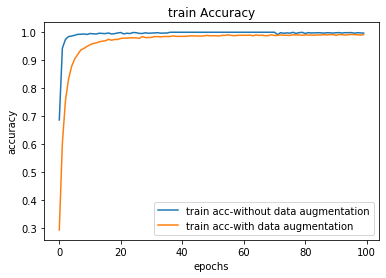

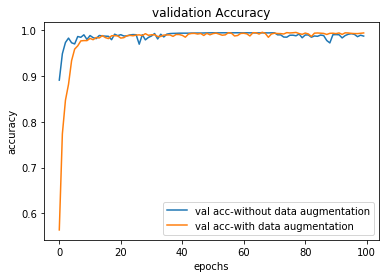

In [23]:
#plot data augmentation
import matplotlib.pyplot as plt
history3=history_aug
history4=history_adam
plt.figure(0)
plt.plot(history4.history['accuracy'], label='train acc-without data augmentation')
plt.plot(history3.history['accuracy'], label='train acc-with data augmentation')
plt.title('train Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history4.history['val_accuracy'], label='val acc-without data augmentation')
plt.plot(history3.history['val_accuracy'], label='val acc-with data augmentation')
plt.title('validation Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()


In [42]:
#model with batch_normalization
height = 30
width = 30
channels = 3
num_classes = 43
X_train,X_valid,Y_train,Y_valid = train_test_split(x_train,y_train,test_size = 0.3,random_state=0)

model2 = keras.models.Sequential()

model2.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=x_train.shape[1:], use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), padding='same', use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(256, use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dense(num_classes, use_bias=False))
model2.add(BatchNormalization())
model2.add(Activation("softmax"))

model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18432     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 15, 15, 64)       

In [43]:
# Train Model with bach_normalization
epochs = 15
history_norm = model2.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), batch_size=32, epochs=epochs,verbose=1)

Train on 27446 samples, validate on 11763 samples
Epoch 1/15
27446/27446 [==============================] - 35s 1ms/sample - loss: 1.2976 - accuracy: 0.7487 - val_loss: 0.2913 - val_accuracy: 0.9723
Epoch 2/15
27446/27446 [==============================] - 33s 1ms/sample - loss: 0.4339 - accuracy: 0.9423 - val_loss: 0.1197 - val_accuracy: 0.9880
Epoch 3/15
27446/27446 [==============================] - 32s 1ms/sample - loss: 0.2553 - accuracy: 0.9696 - val_loss: 0.0854 - val_accuracy: 0.9900
Epoch 4/15
27446/27446 [==============================] - 36s 1ms/sample - loss: 0.1640 - accuracy: 0.9823 - val_loss: 0.0526 - val_accuracy: 0.9941
Epoch 5/15
27446/27446 [==============================] - 35s 1ms/sample - loss: 0.1079 - accuracy: 0.9899 - val_loss: 0.0443 - val_accuracy: 0.9958
Epoch 6/15
27446/27446 [==============================] - 34s 1ms/sample - loss: 0.0769 - accuracy: 0.9930 - val_loss: 0.0624 - val_accuracy: 0.9916
Epoch 7/15
27446/27446 [==============================] 

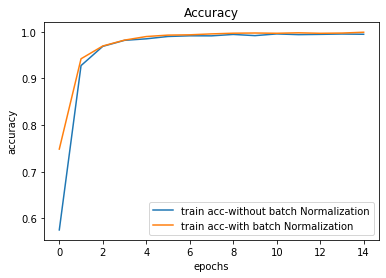

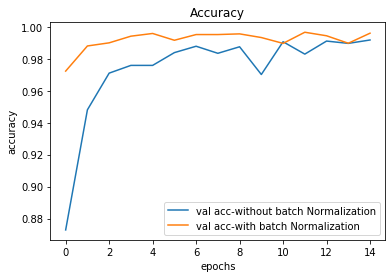

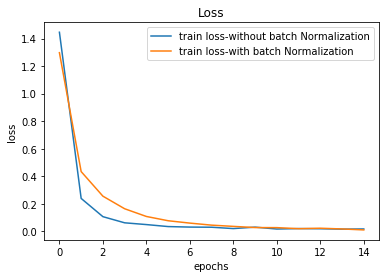

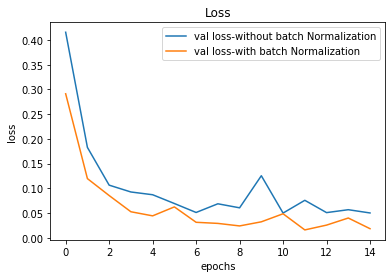

In [50]:
#plot for model_adam and batch_normalization
import matplotlib.pyplot as plt
history1=history_adam
history2=history_norm
plt.figure(0)
plt.plot(history1.history['accuracy'], label='train acc-without batch Normalization')
plt.plot(history2.history['accuracy'], label='train acc-with batch Normalization')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history1.history['val_accuracy'], label='val acc-without batch Normalization')
plt.plot(history2.history['val_accuracy'], label='val acc-with batch Normalization')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(2)
plt.plot(history1.history['loss'], label='train loss-without batch Normalization')
plt.plot(history2.history['loss'], label='train loss-with batch Normalization')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.figure(3)
plt.plot(history1.history['val_loss'], label='val loss-without batch Normalization')
plt.plot(history2.history['val_loss'], label='val loss-with batch Normalization')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()